In [1]:
!gdown --id 1VyGxwUTIkAGkioo_eFpVDsu6Nz-DxLDF
!gdown --id 1nB3X_kL4FFex1fXq731Ox1Q8ITtVlu7h

Downloading...
From: https://drive.google.com/uc?id=1VyGxwUTIkAGkioo_eFpVDsu6Nz-DxLDF
To: /content/way.jpg
100% 137k/137k [00:00<00:00, 44.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nB3X_kL4FFex1fXq731Ox1Q8ITtVlu7h
To: /content/matching.jpg
100% 419k/419k [00:00<00:00, 59.3MB/s]


In [3]:
import time
from functools import wraps

def calc_time(f):
  @wraps(f)
  def wrapper(*args, **kwds):
    start = time.time()
    result = f(*args, **kwds)
    elapsed = time.time() - start
    print("%s took %ds" % (f.__name__, elapsed))
    return result
  return wrapper

In [4]:
import numpy as np

class Histogram:
    def __init__(self):
        return None

    @calc_time
    def calc_histogram_by_loop(self, image):
        counts = np.zeros(256)
        for x in image.flatten():
            counts[x] += 1
        return counts / image.size
    
    @calc_time
    def calc_histogram_by_numpy(self, image):
        hist, bin = np.histogram(image.flatten(), range(256))
        return hist / image.size

    @calc_time
    def calc_cdf(self, hist):
        cdf = np.zeros(256)
        cdf[0] = hist[0]
        for i in range(1, 256):
            cdf[i] = cdf[i - 1] + hist[i]
        return cdf
    
    @calc_time
    def histogram_equalization(self, image):
        hist = self.calc_histogram_by_loop(image)
        cdf = self.calc_cdf(hist)

        cdf_unit8 = (255 * cdf).astype("uint8")
        image_equalization = np.vectorize(lambda x: cdf_unit8[x])(image)
        return image_equalization

    @calc_time
    def matching(self, src_image, dest_image):
        src_hist = self.calc_histogram_by_loop(src_image)
        src_cdf = self.calc_cdf(src_hist)
        dest_hist = self.calc_histogram_by_loop(dest_image)
        dest_cdf = self.calc_cdf(dest_hist)

        matching_image = src_image.copy()
        for i in range(256):
            out = np.argmin(np.abs(src_cdf[i] - dest_cdf))
            matching_image[src_image==i] = out

        return matching_image


## Calculate histogram

In [5]:
import cv2

image = cv2.imread('way.jpg', 0)
histogram = Histogram()

Compare calculate histogram by loop and numpy

In [6]:
histogram.calc_histogram_by_loop(image)[0]

calc_histogram_by_loop took 0s


0.00012804878048780488

In [7]:
histogram.calc_histogram_by_numpy(image)[0]

calc_histogram_by_numpy took 0s


0.00012804878048780488

Calculate and visualize histogram of the image

calc_histogram_by_loop took 0s
calc_cdf took 0s


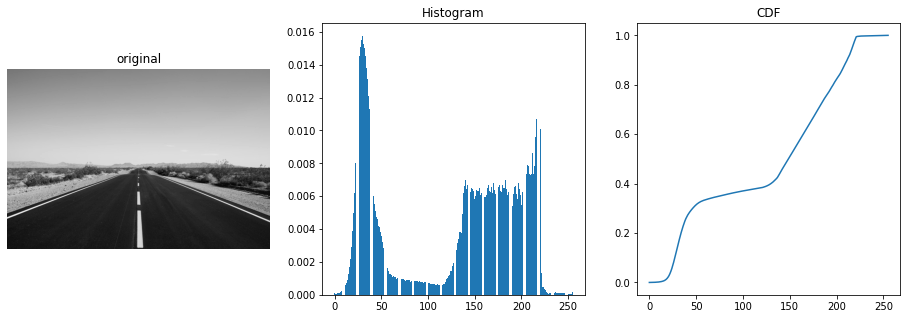

In [8]:
import matplotlib.pyplot as plt

hist = histogram.calc_histogram_by_loop(image)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=12)

ax[1].bar(range(256), hist) 
ax[1].set_title("Histogram", fontsize=12)

ax[2].plot(range(256), histogram.calc_cdf(hist))
ax[2].set_title("CDF", fontsize=12)

plt.show() 

## Histogram Equalization
Histogram Equalization is an operation to create an image (from a given image) whose pixels’s value distributed uniformly in [0, 255]

* Purpose of histogram equalization: to create image not too dark, not too bright, and high contrast.

calc_histogram_by_loop took 0s
calc_cdf took 0s
histogram_equalization took 0s
calc_histogram_by_loop took 0s
calc_cdf took 0s


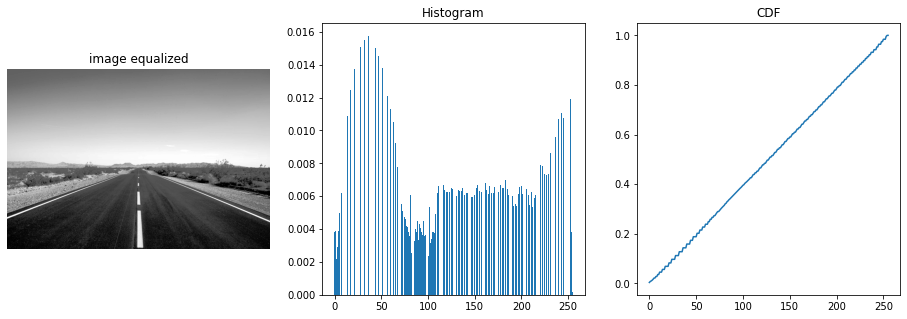

In [9]:
image_equalization = histogram.histogram_equalization(image)
histogram_equalization = Histogram()
hist_equalized = histogram_equalization.calc_histogram_by_loop(image_equalization)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].imshow(image_equalization, cmap="gray")
ax[0].axis("off")
ax[0].set_title("image equalized", fontsize=12)

ax[1].bar(range(256), hist_equalized) 
ax[1].set_title("Histogram", fontsize=12)

ax[2].plot(range(256), histogram_equalization.calc_cdf(hist_equalized))
ax[2].set_title("CDF", fontsize=12)

plt.show() 

## Histogram Matching

In [10]:
src_image = cv2.imread('way.jpg', 0)
dest_image = cv2.imread('matching.jpg', 0)
test_matching = Histogram()
src_image = cv2.resize(src_image, (dest_image.shape[1], dest_image.shape[0]))
image_after_matching = test_matching.matching(src_image, dest_image)

calc_histogram_by_loop took 1s
calc_cdf took 0s
calc_histogram_by_loop took 1s
calc_cdf took 0s
matching took 3s


calc_histogram_by_numpy took 0s
calc_histogram_by_numpy took 0s
calc_histogram_by_numpy took 0s


Text(0.5, 1.0, 'Histogram')

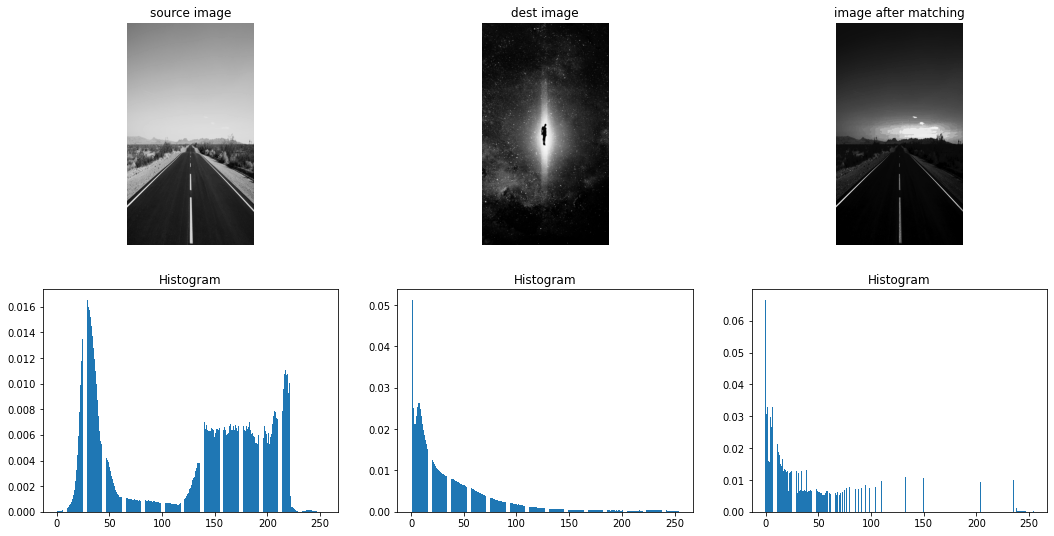

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

ax[0][0].imshow(src_image, cmap="gray")
ax[0][0].axis("off")
ax[0][0].set_title("source image", fontsize=12)

ax[0][1].imshow(dest_image, cmap="gray")
ax[0][1].axis("off")
ax[0][1].set_title("dest image", fontsize=12)

ax[0][2].imshow(image_after_matching, cmap="gray")
ax[0][2].axis("off")
ax[0][2].set_title("image after matching", fontsize=12)

ax[1][0].bar(range(255), test_matching.calc_histogram_by_numpy(src_image)) 
ax[1][0].set_title("Histogram", fontsize=12)

ax[1][1].bar(range(255), test_matching.calc_histogram_by_numpy(dest_image)) 
ax[1][1].set_title("Histogram", fontsize=12)

ax[1][2].bar(range(255), test_matching.calc_histogram_by_numpy(image_after_matching)) 
ax[1][2].set_title("Histogram", fontsize=12)